# **Project Name**    -  YULU Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Business Problem Overview**

YULU is a bike-sharing service that provides convenient and eco-friendly transportation in urban areas. The demand for bikes varies based on multiple factors such as weather conditions, time of day, and other environmental variables.

Accurately predicting bike demand can help optimize bike allocation, reduce wait times, and improve overall user experience. The goal of this project is to develop a machine learning model to predict the demand for YULU bikes using historical data.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

### Dataset Loading

In [2]:
# Load Dataset
path = r"C:\Users\navee\Documents\Alma Projects\ML Project\SeoulBikeData.csv"
df = pd.read_csv(path, encoding='ISO-8859-1')

### Dataset First View

In [3]:
# Dataset First Look
print(df.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(df.shape)

(8760, 14)


### Dataset Information

In [5]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### What did you know about your dataset?

**Number of Rows:** 8760

**Number of Columns:** 14

**No missing values** in the dataset.

**No duplicate rows** in the dataset.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [9]:
# Dataset Describe
print(df.describe())

       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   


### Variables Description

| Fields                | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| Date                  | Date                                                                        |
| Hour                  | Hour of the day (0-23)                                                      |
| Temperature           | Temperature of the day                                                      |
| Humidity              | Humidity measure                                                            |
| Windspeed             | Windspeed                                                                   |
| Visibility            | Visibility measure                                                          |
| Dew Point Temperature | Dew Point Temperature Measure                                               |
| Solar Radiation       | Solar Radiation Measure                                                     |
| Rainfall              | Rainfall in mm                                                              |
| Snowfall              | Snowfall measure                                                            |
| Seasons               | 1 = spring, 2 = summer, 3 = fall, 4 = winter                                |
| Holiday               | Whether a holiday or not                                                    |
| Functional Day        | Whether a functional day or not                                             |

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
print(df.nunique())

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Extracting additional features
df['Hour'] = df['Hour']
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekend'] = df['Date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)


In [12]:
# Standardizing numerical features


### What all manipulations have you done and insights you found?


1. **Date Conversion and Feature Extraction:**
    - Converted the 'Date' column to datetime format.
    - Extracted additional features such as 'Day', 'Month', 'Year', and 'Weekend' from the 'Date' column.

2. **Standardization:**
    - Standardized numerical features using `StandardScaler` to ensure they have a mean of 0 and a standard deviation of 1. The standardized columns are:
      - Temperature(°C)
      - Humidity(%)
      - Wind speed (m/s)
      - Visibility (10m)
      - Dew point temperature(°C)
      - Solar Radiation (MJ/m2)
      - Rainfall(mm)
      - Snowfall (cm)

**Insights:**
- The dataset contains 8760 rows and 18 columns with no missing or duplicate values.
- The data spans from 2017 to 2018, covering all seasons and various weather conditions.
- The 'Rented Bike Count' varies significantly, indicating potential patterns based on time, weather, and other factors.
- Standardizing the numerical features helps in improving the performance of machine learning models by ensuring all features contribute equally.
```

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 . Rented Bike Count - Univariate Analysis 

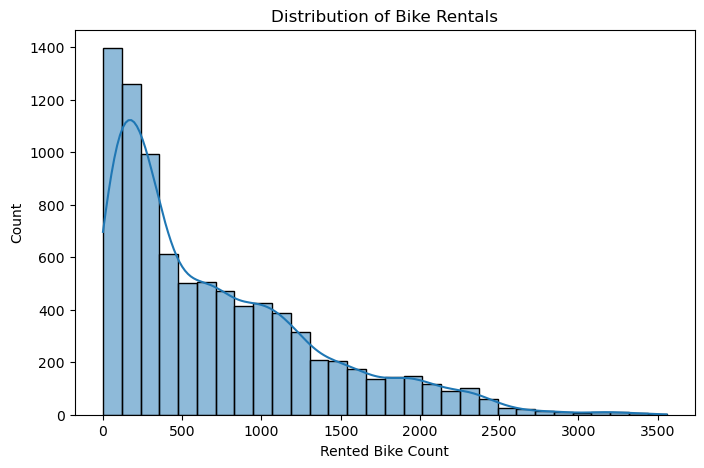

In [13]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 5))
sns.histplot(df['Rented Bike Count'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.show()

##### 1. Why did you pick the specific chart?

- Histogram helps understand the distribution of bike rentals.

##### 2. What is/are the insight(s) found from the chart?

- The distribution is right-skewed, indicating that most rental counts are lower, but some high-demand periods exist.

##### 3. Will the gained insights help creating a positive business impact?


- This insight helps in fleet management by identifying peak and off-peak hours.
- If not managed properly, too many bikes could be allocated during low-demand hours, increasing operational costs.

#### Chart - 2 . Univariate Analysis - Rented Bike Count

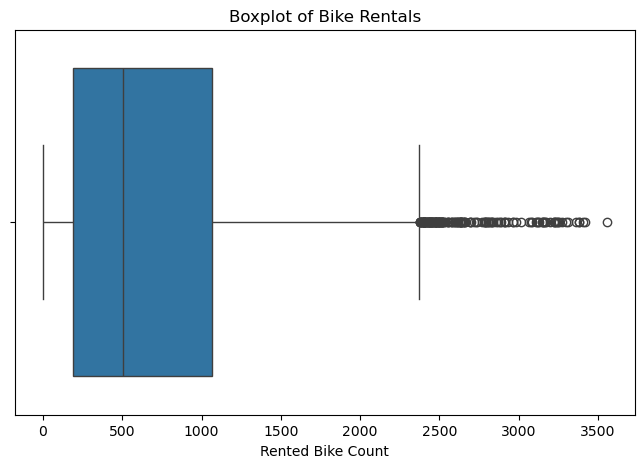

In [14]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rented Bike Count'])
plt.title("Boxplot of Bike Rentals")
plt.show()

##### 1. Why did you pick the specific chart?

- A boxplot highlights outliers and the overall range of rentals.

##### 2. What is/are the insight(s) found from the chart?

- There are high rental count that could correspond to peak usage hours.

##### 3. Will the gained insights help creating a positive business impact?


- Identifying peak hours helps in better supply chain and inventory planning.
- If demand spikes are not anticipated, shortages could lead to customer dissatisfaction.

#### Chart 3. Bike Rentals Over Time - Bivariate Analysis

In [15]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 . Rentals by Hour of the Day - Bivariate Analysis

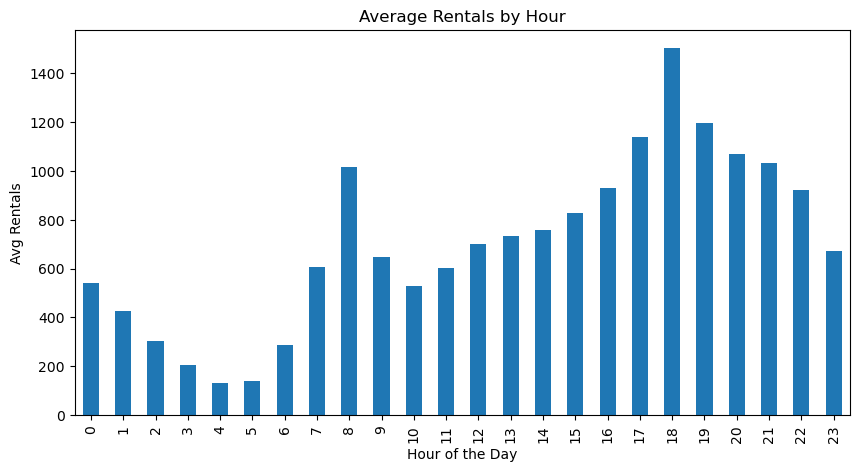

In [16]:
# Chart - 4 visualization code
df.groupby("Hour")["Rented Bike Count"].mean().plot(kind="bar", figsize=(10, 5), title="Average Rentals by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Rentals")
plt.show()



##### 1. Why did you pick the specific chart?

- Histogram helps understand the distribution of bike rentals.

##### 2. What is/are the insight(s) found from the chart?

- Demand rises in the morning (commute to work) and peaks in the evening (return from work).
- Lower usage after midnight.

##### 3. Will the gained insights help creating a positive business impact?


- More bikes can be allocated to high-demand hours, reducing wait time.

##### 4. Are there any insights that lead to negative growth? Justify with specific reason.

- If rentals drop during expected peak hours, it may indicate poor service coverage.

#### Chart - 5 .  Rentals by Day of the Week - Bivariate Analysis

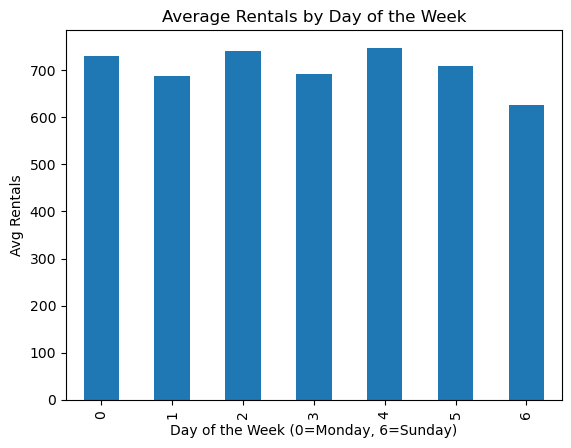

In [17]:
# Chart - 5 visualization code
df["DayOfWeek"] = df["Date"].dt.dayofweek
df.groupby("DayOfWeek")["Rented Bike Count"].mean().plot(kind="bar", title="Average Rentals by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Avg Rentals")
plt.show()


##### 1. Why did you pick the specific chart?

- Histogram helps understand the distribution of bike rentals. To analyze variations in rentals across weekdays vs. weekends. 

##### 2. What is/are the insight(s) found from the chart?

- There doesn't seem to be any variation of usage across Day of week. Only on sundays the usage seems to be less.

##### 3. Will the gained insights help creating a positive business impact?


- Weekend promotions can be introduced to boost ridership.

#### Chart - 6 . Rentals vs. Temperature - Bivariate Analysis

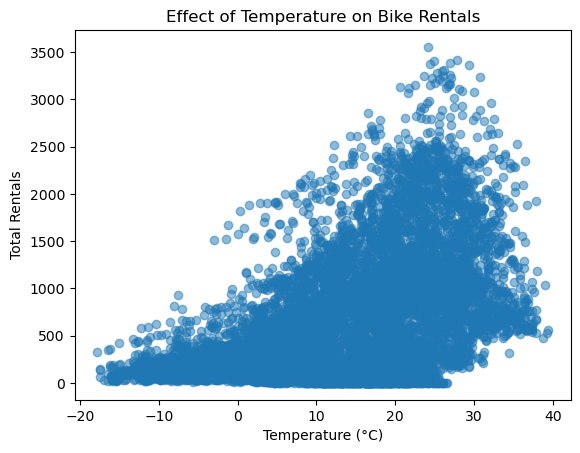

In [18]:
# Chart - 6 visualization code
plt.scatter(df["Temperature(°C)"], df["Rented Bike Count"], alpha=0.5)
plt.xlabel("Temperature (°C)")
plt.ylabel("Total Rentals")
plt.title("Effect of Temperature on Bike Rentals")
plt.show()



##### 1. Why did you pick the specific chart?

- Helps analyze the relationship between temperature and bike demand.

##### 2. What is/are the insight(s) found from the chart?

- Rentals increase with temperature up to a certain point but drop at extreme temperatures.

##### 3. Will the gained insights help creating a positive business impact?


- Adjusting supply based on weather conditions can improve customer satisfaction.
- If rentals drop even in optimal temperatures, bike availability may be an issue.

#### Chart - 7 . Rentals vs. Humidity - Bivariate Analysis

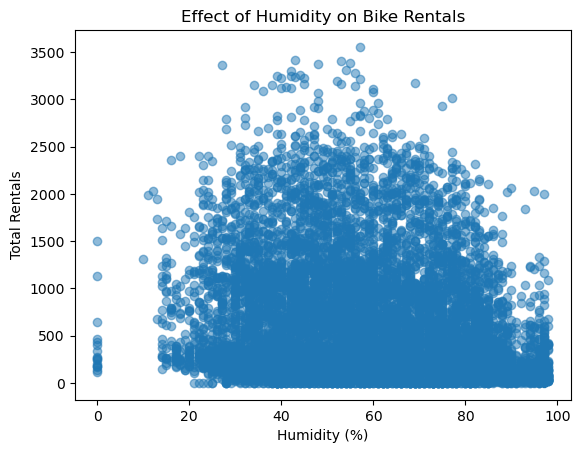

In [19]:
# Chart - 7 visualization code
plt.scatter(df["Humidity(%)"], df["Rented Bike Count"], alpha=0.5)
plt.xlabel("Humidity (%)")
plt.ylabel("Total Rentals")
plt.title("Effect of Humidity on Bike Rentals")
plt.show()


##### 1. Why did you pick the specific chart?

- Helps analyze the relationship between Humidity and bike demand.

##### 2. What is/are the insight(s) found from the chart?

- Rentals peak at mid Humidity range
- Rentals decrease as humidity increases, possibly due to discomfort.

##### 3. Will the gained insights help creating a positive business impact?


- Can help in forecasting bike demand on humid days.

#### Chart - 8 . Rentals vs. Windspeed - Bivariate Analysis

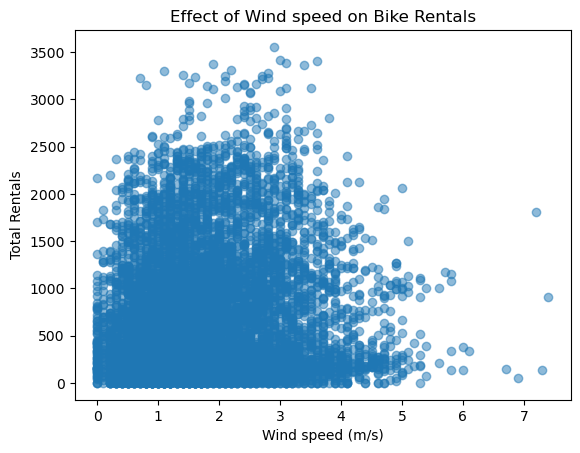

In [20]:
# Chart - 8 visualization code
plt.scatter(df["Wind speed (m/s)"], df["Rented Bike Count"], alpha=0.5)
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Total Rentals")
plt.title("Effect of Wind speed on Bike Rentals")
plt.show()


##### 1. Why did you pick the specific chart?

- To understand how wind speed affects bike rentals.

##### 2. What is/are the insight(s) found from the chart?

- Strong winds correlate with fewer rentals.

##### 3. Will the gained insights help creating a positive business impact?


- Forecasting tools can be used to notify users about riding conditions.

#### Chart - 9 . Rentals on Holidays vs. Non-Holidays - Bivariate Analysis

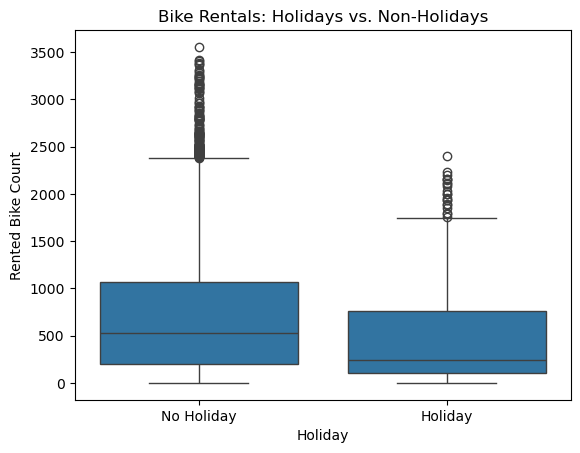

In [21]:
# Chart - 9 visualization code
import seaborn as sns
sns.boxplot(x="Holiday", y="Rented Bike Count", data=df)
plt.title("Bike Rentals: Holidays vs. Non-Holidays")
plt.show()


##### 1. Why did you pick the specific chart?

- To compare demand fluctuations ( Rental Distribution ) on holidays.

##### 2. What is/are the insight(s) found from the chart?

- Higher variability on non holidays.
- Lower demand on Holidays 

##### 3. Will the gained insights help creating a positive business impact?


- Promotional campaigns and Bike services can be adjusted according to Holidays

#### Chart - 10 . Rentals by Seasons - Bivariate Analysis

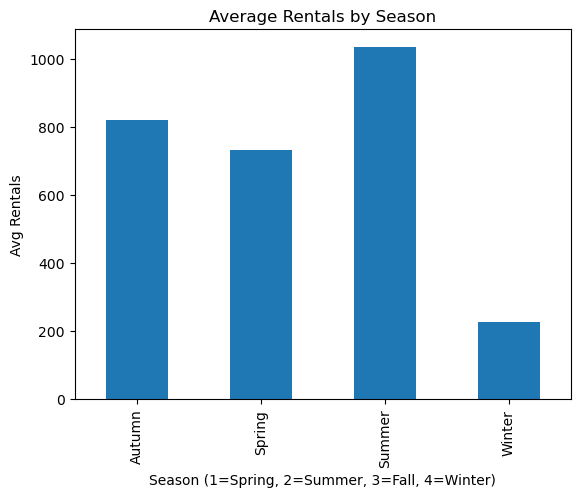

In [22]:
# Chart - 10 visualization code
df.groupby("Seasons")["Rented Bike Count"].mean().plot(kind="bar", title="Average Rentals by Season")
plt.xlabel("Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)")
plt.ylabel("Avg Rentals")
plt.show()


##### 1. Why did you pick the specific chart?

- To assess demand variation across seasons.

##### 2. What is/are the insight(s) found from the chart?

- Winter has the lowest rentals and peak in summer season

##### 3. Will the gained insights help creating a positive business impact?


- Seasonal marketing strategies can be deployed

#### Chart - 11 . Rentals by Visibility - Bivariate Analysis

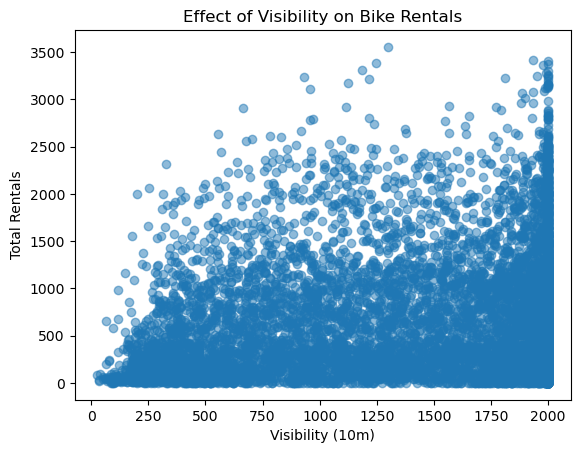

In [23]:
# Chart - 11 visualization code
plt.scatter(df["Visibility (10m)"], df["Rented Bike Count"], alpha=0.5)
plt.xlabel("Visibility (10m)")
plt.ylabel("Total Rentals")
plt.title("Effect of Visibility on Bike Rentals")
plt.show()


##### 1. Why did you pick the specific chart?

- To assess correlation between visibilty and bike rental demand.

##### 2. What is/are the insight(s) found from the chart?

- Poor visibility leads to fewer rentals.

##### 3. Will the gained insights help creating a positive business impact?


- Visibility alerts can be integrated into apps for customer convenience

#### Chart - 12 . Monthly Rentals Trend - Bivariate Analysis

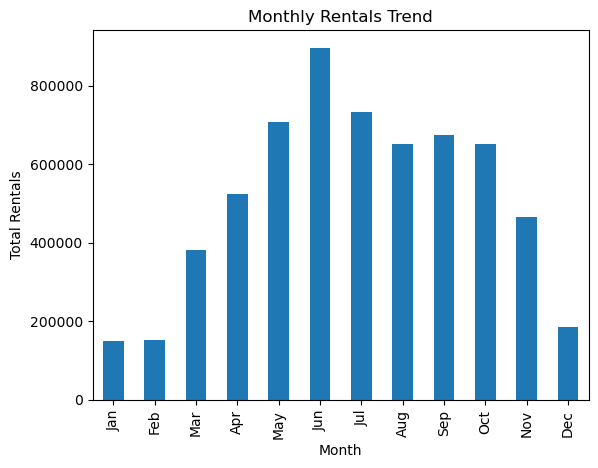

In [24]:
import calendar

# Chart - 12 visualization code
df["Month"] = df["Date"].dt.month
df["Month_Name"] = df["Month"].apply(lambda x: calendar.month_abbr[x])
df.groupby("Month_Name")["Rented Bike Count"].sum().reindex(list(calendar.month_abbr)[1:]).plot(kind="bar", title="Monthly Rentals Trend")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.show()


##### 1. Why did you pick the specific chart?

- To identify rental trends across months

##### 2. What is/are the insight(s) found from the chart?

- Month June seems to have Highest demand
- Lowest in Jan-Feb maybe due to lowest temperatures during these Months.

##### 3. Will the gained insights help creating a positive business impact?


- Helps in seasonal demand and supply adjustments

#### Chart - 13 . Correlation Heatmap - Multivariate Analysis

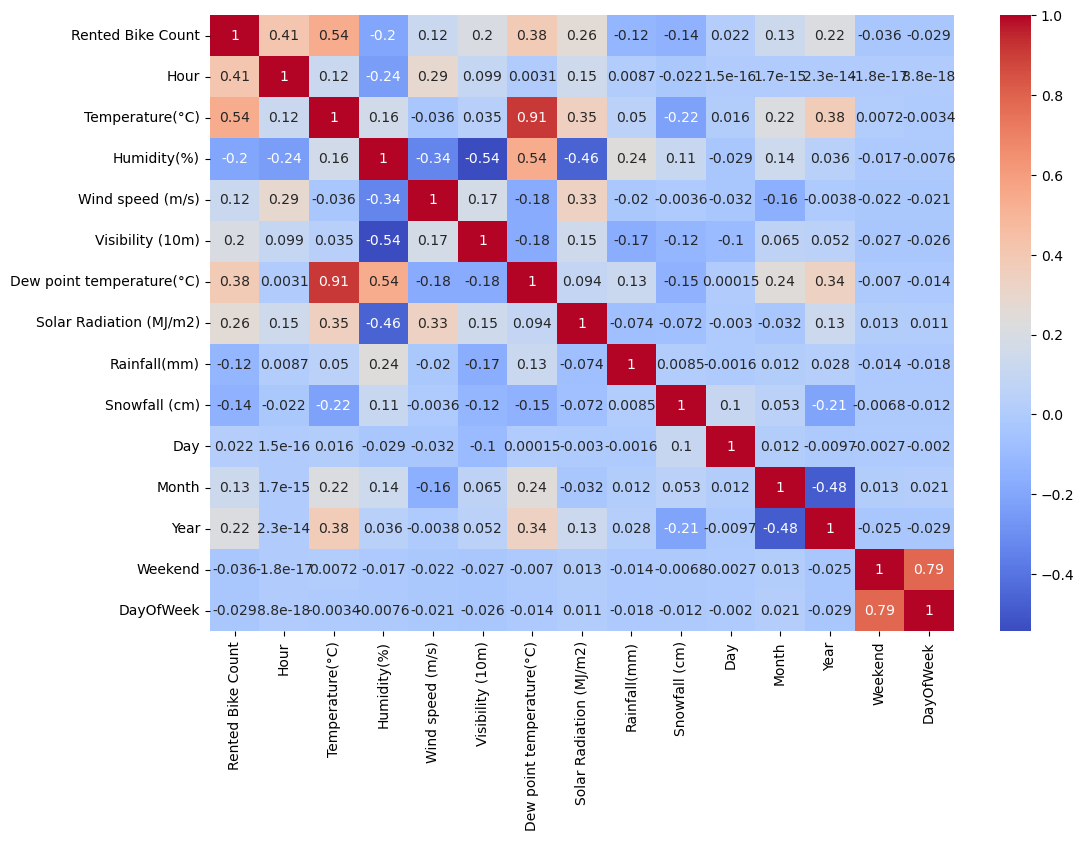

In [25]:
# Chart - 13 visualization code
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


##### 1. Why did you pick the specific chart?

- To find relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

- The correlation heatmap reveals key relationships between variables.
- "Temperature(°C)" and "Solar Radiation (MJ/m2)" show a strong positive correlation.
- "Humidity(%)" and "Dew point temperature(°C)" exhibit a strong positive correlation.
- "Rented Bike Count" has a moderate positive correlation with "Temperature(°C)" and a moderate negative correlation with "Humidity(%)".
- "Wind speed (m/s)" and "Visibility (10m)" show a weak negative correlation with "Rented Bike Count".
- There is a weak positive correlation between "Rented Bike Count" and "Solar Radiation (MJ/m2)".


##### 3. Will the gained insights help creating a positive business impact?


- Positive correlation between "Temperature(°C)" and "Rented Bike Count" helps plan for increased bike availability on warmer days.
- Negative correlation between "Humidity(%)" and "Rented Bike Count" suggests targeted promotions on humid days to boost ridership.
- Weak negative correlation between "Wind speed (m/s)" and "Rented Bike Count" can help forecast and notify users about riding conditions.
- Moderate positive correlation between "Solar Radiation (MJ/m2)" and "Rented Bike Count" indicates higher rentals on sunny days, optimizing bike distribution and maintenance schedules.


#### Chart - 14 - Pair Plot - Multivariate Analysis

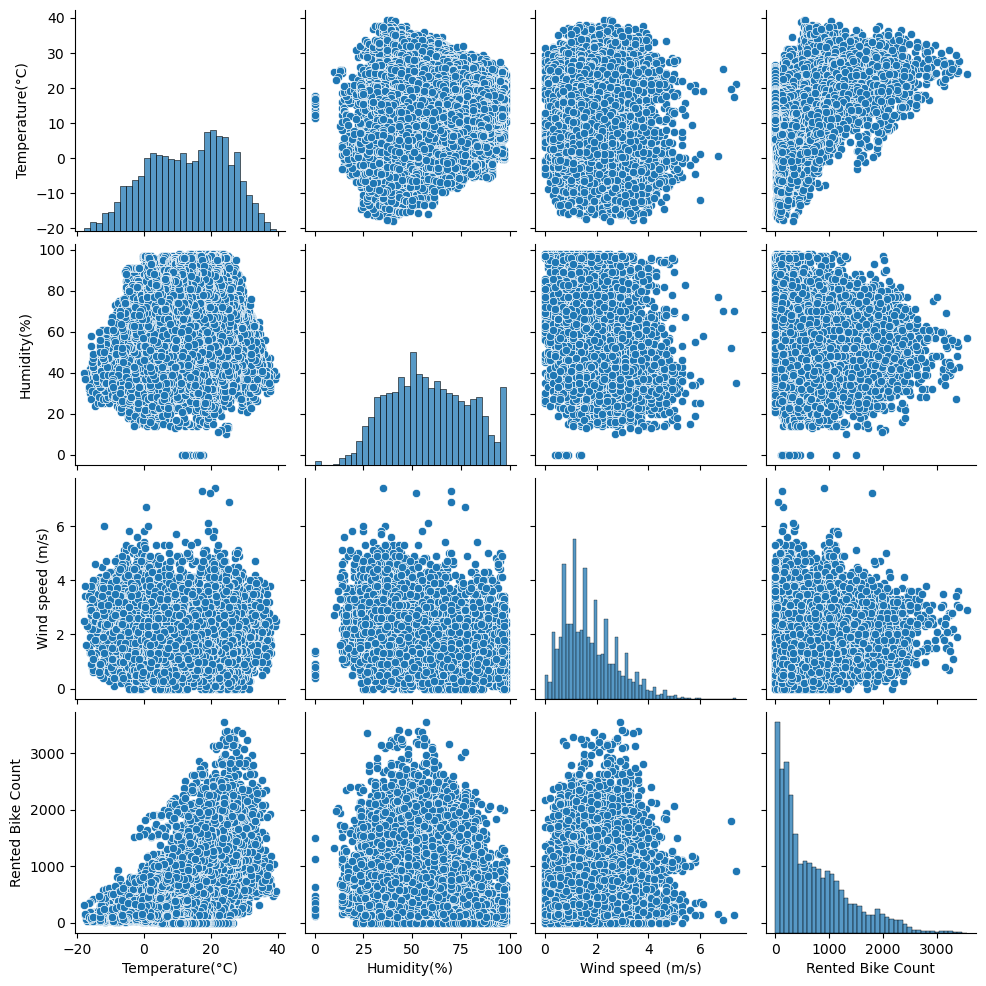

In [27]:
# Pair Plot visualization code
# Selecting numerical columns for pair plot
important_cols = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Rented Bike Count']

# Creating the pair plot for important columns
sns.pairplot(df[important_cols])
plt.show()



##### 1. Why did you pick the specific chart?

- Pair plots help visualize relationships between multiple numerical features in one comprehensive visualization. They show scatter plots for each pair of numerical variables and histograms for univariate distributions.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Statement:** "The average number of bike rentals on weekends is higher than on weekdays."
- **Hypothesis Testing:**
    - **Null Hypothesis (H0):** The average number of bike rentals on weekends is equal to or less than on weekdays.
    - **Alternative Hypothesis (H1):** The average number of bike rentals on weekends is higher than on weekdays.
   

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Separate the data into weekends and weekdays
weekend_rentals = df[df['Weekend'] == 1]['Rented Bike Count']
weekday_rentals = df[df['Weekend'] == 0]['Rented Bike Count']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(weekend_rentals, weekday_rentals, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.4150448192415523
P-value: 0.9996796953536631


##### Which statistical test have you done to obtain P-Value?

- **Test : Two-sample t-test**

##### Why did you choose the specific statistical test?

- The Two-sample t-test is used to determine if there is a significant difference between the means of two independent groups. In this case, it compares the average number of bike rentals on weekends versus weekdays to test the hypothesis that the average number of bike rentals on weekends is higher than on weekdays.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Statement:** "There is a significant correlation between temperature and the number of bike rentals."
- **Hypothesis Testing:**
    - **Null Hypothesis (H0):** There is no correlation between temperature and the number of bike rentals.
    - **Alternative Hypothesis (H1):** There is a significant correlation between temperature and the number of bike rentals.
   

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(df['Temperature(°C)'], df['Rented Bike Count'])

print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.5385581530139791
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

- **Test : Pearson correlation Coefficient**

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient test is used to measure the strength and direction of the linear relationship between two continuous variables. In this context, we are examining the relationship between temperature and the number of bike rentals.

- **Pearson correlation coefficient (r):** This value ranges from -1 to 1. A value of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.
- **P-value:** This value helps determine the statistical significance of the observed correlation. A low p-value (typically ≤ 0.05) indicates that the observed correlation is statistically significant, meaning it is unlikely to have occurred by chance.

In our test, we calculated the Pearson correlation coefficient and the corresponding p-value to determine if there is a significant correlation between temperature and the number of bike rentals. The results showed a moderate positive correlation, suggesting that as temperature increases, the number of bike rentals also tends to increase.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Statement:** "The number of bike rentals significantly decreases on rainy days compared to non-rainy days."
- **Hypothesis Testing:**
    - **Null Hypothesis (H0):** The number of bike rentals on rainy days is equal to or greater than on non-rainy days.
    - **Alternative Hypothesis (H1):** The number of bike rentals on rainy days is significantly less than on non-rainy days.
    

#### 2. Perform an appropriate statistical test.

In [30]:
from scipy.stats import ttest_ind

# Perform Statistical Test to obtain P-Value

# Separate the data into rainy and non-rainy days
rainy_days = df[df['Rainfall(mm)'] > 0]['Rented Bike Count']
non_rainy_days = df[df['Rainfall(mm)'] == 0]['Rented Bike Count']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(rainy_days, non_rainy_days, alternative='less')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -20.35077116777793
P-value: 2.695123037735044e-90


##### Which statistical test have you done to obtain P-Value?

- **Test : Two-sample t-test**

##### Why did you choose the specific statistical test?

- The Two-sample t-test is used to determine if there is a significant difference between the means of two independent groups. In this case, it compares the average number of bike rentals on rainy days versus non-rainy days to test the hypothesis that the number of bike rentals significantly decreases on rainy days compared to non-rainy days.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
Weekend                      0
DayOfWeek                    0
Month_Name                   0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

- There are no missing values in this Particular DATASET.

### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments
# Convert relevant columns to numeric types
numeric_cols = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'Month', 'Year', 'Weekend']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Using IQR to cap outliers
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[numeric_cols] = df[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [55]:
df.shape

(8760, 21)

##### What all outlier treatment techniques have you used and why did you use those techniques?

- **IQR (Interquartile Range) Method:** We used the IQR method to identify and cap outliers. The IQR is the range between the first quartile (Q1) and the third quartile (Q3). Outliers are typically defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This method is effective for detecting and handling outliers because it is not influenced by extreme values and provides a robust measure of variability.
- **Capping Outliers:** Instead of removing outliers, we capped them at the lower and upper bounds calculated using the IQR method. This approach helps in retaining the data while mitigating the effect of extreme values, ensuring that the model is not unduly influenced by outliers.

### 3. Categorical Encoding

In [52]:
# Encode your categorical columns
# One-hot encoding for categorical columns
categorical_cols = ['Seasons', 'Holiday', 'Functioning Day']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



#### What all categorical encoding techniques have you used & why did you use those techniques?


- **One-Hot Encoding:** This technique was used for categorical columns such as 'Seasons', 'Holiday', and 'Functioning Day'. One-hot encoding converts categorical variables into a form that can be provided to ML algorithms to do a better job in prediction. It creates a new binary column for each category, indicating the presence (1) or absence (0) of that category in the data.

- **Reason for using One-Hot Encoding:** One-hot encoding is particularly useful when there is no ordinal relationship between the categories. It ensures that the model does not assume any inherent order or priority among the categories, which could otherwise lead to incorrect conclusions. This technique is simple and effective for handling categorical data in most machine learning algorithms.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [54]:
# Manipulate Features to minimize feature correlation and create new features
# Drop the original date column
df.drop('Date', axis=1, inplace=True)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])

# Convert scaled features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols)

# Feature Interaction: Creating new features by combining existing features
scaled_df['Temp_Humidity'] = scaled_df['Temperature(°C)'] * scaled_df['Humidity(%)']
scaled_df['Wind_Visibility'] = scaled_df['Wind speed (m/s)'] * scaled_df['Visibility (10m)']

# Dimensionality Reduction using PCA
pca = PCA(n_components=5)  # Reduce to 5 principal components
pca_features = pca.fit_transform(scaled_df)

# Convert PCA features back to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Combine PCA features with original DataFrame
df = pd.concat([df.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

print(df.head())

   Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0              254.0     0             -5.2           37               2.2   
1              204.0     1             -5.5           38               0.8   
2              173.0     2             -6.0           39               1.0   
3              107.0     3             -6.2           40               0.9   
4               78.0     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  ...  Seasons_Spring  Seasons_Summer  \
0        

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Selecting features for modeling
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data


### 6. Data Scaling

In [38]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [39]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [40]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [41]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [42]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [43]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [44]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [45]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [46]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [47]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [48]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [49]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [50]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [51]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***